# Exercise 2.4
Author: Sebastian Pritz

## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.svm import SVC

from pyMLaux import plot_2d_prediction

In [2]:
data_dir = "src/"

## Normal Data

In [3]:
# Read in the data
data = pd.read_csv(data_dir+"Dataset1.csv")
data

,x1,x2,y
0,0.914806,0.885118,1
1,0.937075,0.517111,1
2,0.286140,0.851931,0
3,0.830448,0.442796,1
4,0.641746,0.157880,1
...,...,...,...
195,0.053129,0.490750,0
196,0.531874,0.965256,1
197,0.112308,0.906942,0
198,0.743188,0.551251,1


In [4]:
def apply_grid_search(X, y):
    # Apply gridsearch
    param_grid = [
      {'C': [1, 4, 16, 64, 256], 'kernel': ['linear']},
      {'C': [1, 4, 16, 64, 256], 'gamma': [1, 0.01, 0.0001], 'kernel': ['rbf']},
     ]

    svc_grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    svc_grid_search.fit(X_train, y_train)
    
    return svc_grid_search.best_score_, svc_grid_search.best_estimator_, pd.DataFrame(svc_grid_search.cv_results_)

In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)
score, best_estimator, cv_results = apply_grid_search(X_train, y_train)
print(score, best_estimator)
best_estimator.score(X_test, y_test)

1.0 SVC(C=16, gamma=1)


0.95

C:\Users\basti\anaconda3\envs\MLTeaching\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


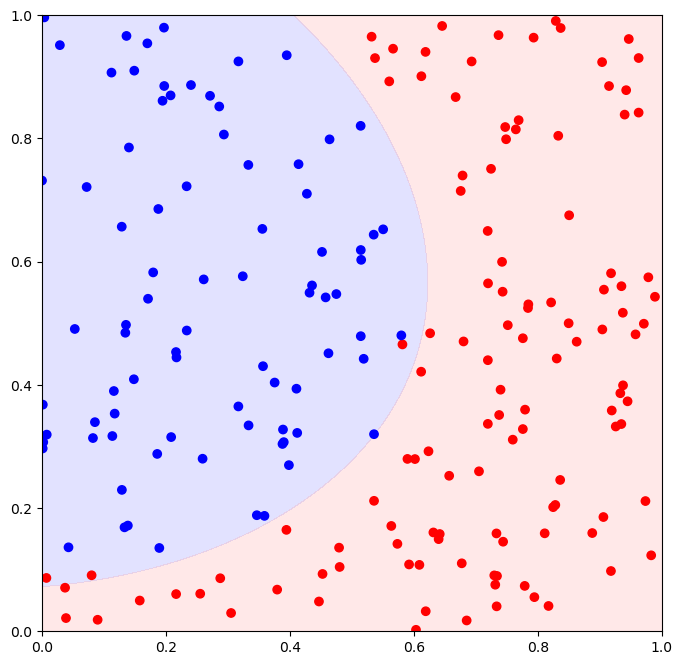

In [6]:
plot_2d_prediction(X, y, best_estimator.decision_function, 
                   xval=np.linspace(0, 1, 201), yval=np.linspace(0, 1, 201))

## Noisy data

In [7]:
# Create noisy dataset
noisy_data = data.copy(deep=True)
for i in range(10):
    noisy_data[f"x{i+3}"] = np.random.uniform(size=noisy_data.shape[0])

cols = list(noisy_data.columns.values)
cols.pop(cols.index("y"))
noisy_data = noisy_data[cols + ["y"]]
noisy_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,0.914806,0.885118,0.375055,0.284770,0.651186,0.736219,0.699472,0.010097,0.192233,0.253310,0.355567,0.684832,1
1,0.937075,0.517111,0.743134,0.025969,0.146304,0.895315,0.279566,0.422681,0.791806,0.468513,0.003840,0.543668,1
2,0.286140,0.851931,0.397362,0.115905,0.535645,0.344524,0.149643,0.263230,0.617375,0.804645,0.044673,0.231460,0
3,0.830448,0.442796,0.474454,0.648627,0.542182,0.717275,0.345648,0.196071,0.604980,0.723759,0.771168,0.444098,1
4,0.641746,0.157880,0.302353,0.931861,0.577030,0.220521,0.883947,0.287544,0.985824,0.833447,0.017660,0.763388,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.053129,0.490750,0.831544,0.264399,0.580849,0.636917,0.573821,0.991338,0.510884,0.576342,0.481645,0.508225,0
196,0.531874,0.965256,0.039422,0.038214,0.253578,0.192396,0.958772,0.583763,0.159350,0.841082,0.165450,0.310631,1
197,0.112308,0.906942,0.949486,0.653967,0.786904,0.597129,0.505753,0.889178,0.246269,0.223223,0.956225,0.240636,0
198,0.743188,0.551251,0.130664,0.512717,0.777192,0.079366,0.742545,0.031322,0.166599,0.743682,0.453538,0.754025,1


In [8]:
X = noisy_data.iloc[:,:-1]
y = noisy_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)
score, best_estimator, cv_results = apply_grid_search(X_train, y_train)
print(score, best_estimator)
best_estimator.score(X_test, y_test)

0.9 SVC(C=4, kernel='linear')


0.7666666666666667

In [9]:
# Due to there being 12 features now, it cannot be plotted anymore, but the problem surely isn't linearly separable, as was seen in the last plot.

## Observations

As can be seen in the attempts above, the noisy data has an almost 17% higher generalization error. This is most likely due to the fact that SVMs cannot deal with noise on their own, because they lack a measure of feature importance and therefor feature selection as a whole is missing. 